# 3.1 Erro Aleatório

In [5]:
### Imports ###
import numpy as np
import csv
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import scipy.stats

In [6]:
df = pd.read_csv("01.csv")

In [7]:
df.describe() #descrição da tabela de dados

,medidas de massa
count,110.000000
mean,999.563636
std,1.274501
min,997.000000
25%,999.000000
50%,999.000000
75%,1000.000000
max,1003.000000


#### O valor da média é de 999.563636 g conforme acima.
#### O valor do desvio padrão é 1.274501 g conforme acima.

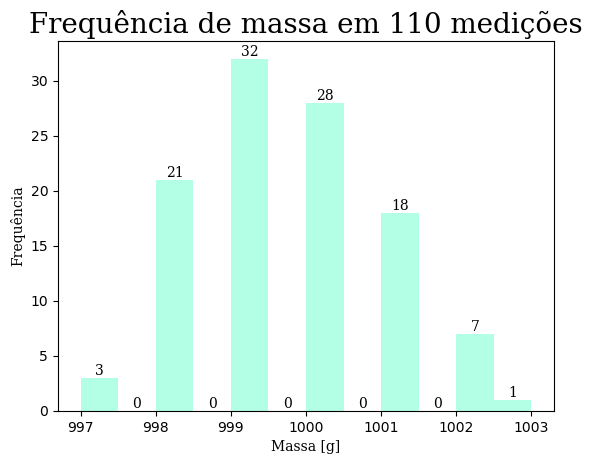

In [8]:
### Gráfico com frequência de massas
values, bins, bars = plt.hist(df,bins=12,color='aquamarine',alpha=0.6)
plt.bar_label(bars,color='black', font='serif')
plt.xlabel("Massa [g]", font='serif')
plt.ylabel("Frequência", font='serif')
plt.title("Frequência de massa em 110 medições",font='serif',fontsize=20)
plt.show()

### 3.1 (a)
#### De acordo com o gráfico acima, a distribuição dos dados tem o mesmo formato de uma distribuição normal, por isso utilizaremos as ferramentas estatísticas baseadas na distribuição normal.

In [9]:
### Cálculo Re
t = scipy.stats.t.ppf(q=0.95,df=109) #t de Student
u= df.values.std() #Desvio Padrão
re = u*t
print (re)

2.1047058097711053


### 3.1 (b)
#### O coeficiente t de Student para 95% do nível de confiança e n= 110-1, encontramos t = 1.6589534581903567.
#### Calculando a repetitividade = t * u encontramos Re = 2.1047058097711053

In [10]:
## Cálculo do erro aleatório e porcentagem de valores maiores que Re
ea = df.values.mean() - df.values
i=0
for  item in ea:
    if  abs(item) >re:
        i+=1
print(i,i/110)

11 0.1


### 3.1 (c)
#### Conforme cálculos acima, dos 110 valores medidos 11 foram superiores ao valor de Re, o que corresponde a 10%.

# 3.2 Tendência e correção

In [11]:
## Cálculo da Tendência e correção
td = 1000 - df.values.mean()
print(td)
c = -td

0.43636363636358055


### 3.2 (a)
#### O valor da tendência foi de 0.43636363636358055.
#### A correção corresponde a -td, portanto equivale a -0.43636363636358055.

In [12]:
## Cálculo da Tendência e correção para novos dados
df2 = pd.read_csv("02.csv", delimiter=',')
td2 = 5000 - df2.values.mean()
print(td2)
c = -td2

-3.0090909090913556


### 3.2 (b)
#### O valor da tendência foi de -3.0090909090913556. A correção corresponde a -td, portanto equivale 3.0090909090913556. Para cada massa o valor do erro aleatório é distinto, por isso os valores de tendência para massa de 1000g e para massa de 5000g não coincidem.

In [13]:
## Cálculo da Tendência para novos conjuntos de dados e incerteza de repetitivdade
df3 = pd.read_csv("03.csv", delimiter = ',')
td3 = 5000 - df3.values.mean()
i3 = df3.values.std()/np.sqrt(100) 
print("td3, i3: {} {}".format(td3,i3))

df4 = pd.read_csv("04.csv", delimiter = ',')
td4 = 5000 - df4.values.mean()
i4 = df4.values.std()/np.sqrt(16)
print("td4, i4: {} {}".format(td4,i4))

df5 = pd.read_csv("05.csv", delimiter = ',')
td5 = 5000 - df5.values.mean()
i5 = df3.values.std()/np.sqrt(4)
print("td5, i5: {} {}".format(td5,i5))

td3, i3: -2.979797979797695 0.1595320163426233
td4, i4: -3.0 0.5
td5, i5: -2.75 0.7976600817131164


### 3.2 (c)
#### Para n = 100, o valor da tendência foi de -2.979797979797695, com incerteza de 0.1595320163426233;
#### Para n = 16, o valor da tendência foi de -3.0, com incerteza de 0.5;

#### Para n = 4, o valor da tendência foi de -2,75, com incerteza de 0.7976600817131164;

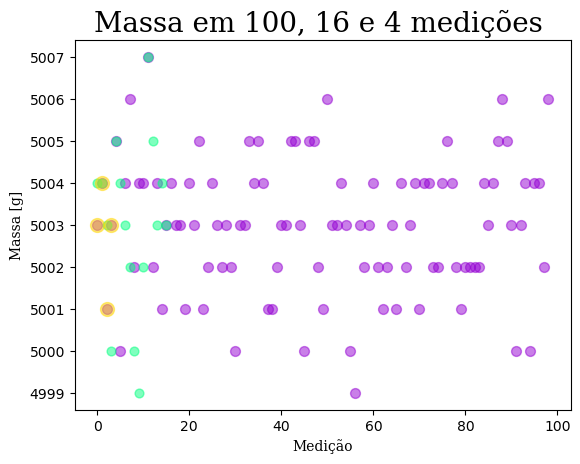

In [14]:
## Gráfico com os valores medidos
y3 = df3.values
y4 = df4.values
y5 = df5.values

plt.scatter(np.arange(len(y3)), y3, c="darkviolet", alpha=0.5, s=50)
plt.scatter(np.arange(len(y4)), y4, c="springgreen", alpha=0.5, s=40)
plt.scatter(np.arange(len(y5)), y5, c="gold", alpha=0.5, s=100)
plt.xlabel("Medição", font='serif')
plt.ylabel("Massa [g]", font='serif')
plt.title("Massa em 100, 16 e 4 medições ",font='serif',fontsize=20)
plt.show()

#### As 100 medições estão representadas pela cor roxa;
#### 16 medições estão representadas pela cor verde;
#### 4 medições estão representadas pela cor laranja;

#### Todas as medidas realizadas (em 4, 16 e 100 medições) estão na mesma faixa, sendo que suas regiões se interceptam, conforme gráfico acima.

# 3.3 Calibração da balança

In [17]:
## Cálculo de Tendência, incerteza de repetitividade e erros somando ou subtraindo incerteza
t1 = scipy.stats.t.ppf(q=0.95,df=99) #t para 100 medições e 95% nível de confiança

#4000g
d40 = pd.read_csv("4000.csv", delimiter = ',')
t40 = 4000 - d40.values.mean()
u= d40.values.std()
re40 = u*t1
rep = re40/np.sqrt(100)
tmax = t40 + re40
tmin = t40 - re40
print("4000g, td: {}, Emax: {}, Emin: {}".format(t40,tmax, tmin))

#4100g
d41 = pd.read_csv("4100.csv", delimiter = ',')
t41 = 4100 - d41.values.mean()
u1= d41.values.std()
re41 = u1*t1
rep1 = re41/np.sqrt(100)
tmax1 = t41 + re41
tmin1 = t41 - re41
print("4100g, td: {}, Emax: {}, Emin: {}".format(t41,tmax1, tmin1))

#4200g
d42 = pd.read_csv("4200.csv", delimiter = ',')
t42 = 4200 - d42.values.mean()
u2= d42.values.std()
re42 = u2*t1
rep2 = re42/np.sqrt(100)
tmax2 = t42 + re42
tmin2 = t42 - re42
print("4200g, td: {}, Emax: {}, Emin: {}".format(t42,tmax2, tmin2))

#4300g
d43 = pd.read_csv("4300.csv", delimiter = ',')
t43 = 4300 - d43.values.mean()
u3= d43.values.std()
re43 = u3*t1
rep3 = re43/np.sqrt(100)
tmax3 = t43 + re43
tmin3 = t43 - re43
print("4300g, td: {}, Emax: {}, Emin: {}".format(t43,tmax3, tmin3))

#4400g
d44 = pd.read_csv("4400.csv", delimiter = ',')
t44 = 4400 - d44.values.mean()
u4= d44.values.std()
re44 = u4*t1
rep4 = re44/np.sqrt(100)
tmax4 = t44 + re44
tmin4 = t44 - re44
print("4400g, td: {}, Emax: {}, Emin: {}".format(t44,tmax4, tmin4))

#4500g
d45 = pd.read_csv("4500.csv", delimiter = ',')
t45 = 4500 - d45.values.mean()
u5= d45.values.std()
re45 = u5*t1
rep5 = re45/np.sqrt(100)
tmax5 = t45 + re45
tmin5 = t45 - re45
print("4500g, td: {}, Emax: {}, Emin: {}".format(t45,tmax5, tmin5))

#4600g
d46 = pd.read_csv("4600.csv", delimiter = ',')
t46 = 4600 - d46.values.mean()
u6= d46.values.std()
re46 = u6*t1
rep6 = re46/np.sqrt(100)
tmax6 = t46 + re46
tmin6 = t46 - re46
print("4600g, td: {}, Emax: {}, Emin: {}".format(t46,tmax6, tmin6))

#4700g
d47 = pd.read_csv("4700.csv", delimiter = ',')
t47 = 4700 - d47.values.mean()
u7= d47.values.std()
re47 = u7*t1
rep7 = re47/np.sqrt(100)
tmax7 = t47 + re47
tmin7 = t47 - re47
print("4700g, td: {}, Emax: {}, Emin: {}".format(t47,tmax7, tmin7))

#4800g
d48 = pd.read_csv("4800.csv", delimiter = ',')
t48 = 4800 - d48.values.mean()
u8= d48.values.std()
re48 = u8*t1
rep8 = re48/np.sqrt(100)
tmax8 = t48 + re48
tmin8 = t48 - re48
print("4800g, td: {}, Emax: {}, Emin: {}".format(t48,tmax8, tmin8))

#4900g
d49 = pd.read_csv("4900.csv", delimiter = ',')
t49 = 4900 - d49.values.mean()
u9= d49.values.std()
re9 = u9*t1
rep9 = re9/np.sqrt(100)
tmax9 = t49 + re9
tmin9 = t49 - re9
print("4900g, td: {}, Emax: {}, Emin: {}".format(t49,tmax9, tmin9))


x1=[4000,4100,4200,4300,4400,4500,4600,4700,4800,4900]
tnd=[t40,t41,t42,t43,t44,t45,t46,t47,t48,t49]
tndmax=[tmax, tmax1, tmax2, tmax3,tmax4,tmax5,tmax6,tmax7,tmax8,tmax9]
tndmin=[tmin, tmin1, tmin2, tmin3,tmin4,tmin5,tmin6,tmin7,tmin8,tmin9]


4000g, td: -2.449999999999818, Emax: 0.24142184971432945, Emin: -5.141421849713966
4100g, td: -2.869999999999891, Emax: -0.4563714380471433, Emin: -5.283628561952638
4200g, td: -2.699999999999818, Emax: 0.06344163152119897, Emin: -5.463441631520835
4300g, td: -2.8900000000003274, Emax: -0.20349942402310006, Emin: -5.576500575977555
4400g, td: -2.7100000000000364, Emax: 0.0010176109146740053, Emin: -5.421017610914747
4500g, td: -2.7100000000000364, Emax: -0.019397737484585065, Emin: -5.400602262515488
4600g, td: -3.1599999999998545, Emax: -0.3744989755627799, Emin: -5.945501024436929
4700g, td: -2.7200000000002547, Emax: 0.5428270519566865, Emin: -5.982827051957196
4800g, td: -2.9899999999997817, Emax: -0.033804222093848146, Emin: -5.946195777905715
4900g, td: -2.9899999999997817, Emax: -0.17716800358841445, Emin: -5.8028319964111486


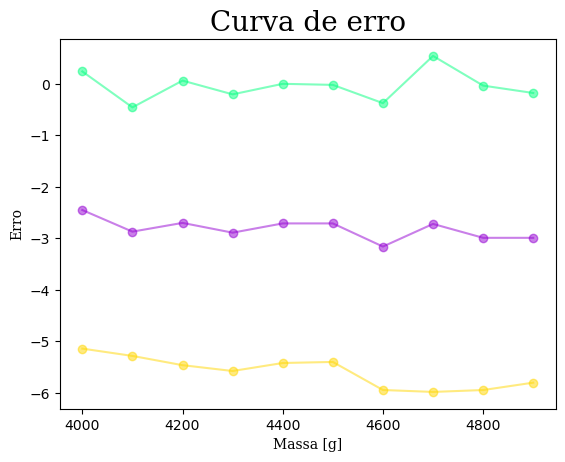

In [18]:
## Curva de erros
plt.scatter(x1, tnd, c="darkviolet", alpha=0.5)
plt.scatter(x1, tndmax, c="springgreen", alpha=0.5)
plt.scatter(x1, tndmin, c="gold", alpha=0.5)
plt.plot(x1, tnd, c="darkviolet", alpha=0.5)
plt.plot(x1, tndmax, c="springgreen", alpha=0.5)
plt.plot(x1, tndmin, c="gold", alpha=0.5)


plt.xlabel("Massa [g]", font='serif')
plt.ylabel("Erro", font='serif')
plt.title("Curva de erro",font='serif',fontsize=20)
plt.show()

#### O erro máximo encontrado foi de 0.5428270519566865, no ponto de medição 4700g

In [25]:
## Cálculo de correção e incerteza da repetitivdade
c = [item*-1 for item in tnd] #Correção
repa = [rep,rep1,rep2,rep3,rep4,rep5,rep6,rep7,rep8,rep9] #Incerteza da repetitividade
res = (0.01/2)/np.sqrt(3) #Incerteza da resolução
resc = [np.sqrt(c*c + res*res) for c in repa]

print("MASSAS: {}g".format(x2))
print("")
print("CORREÇÕES: {}g".format(c))
print("")
print("INCERTEZAS: {}g".format(resc))

MASSAS: [4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 2.449999999999818, 2.869999999999891, 2.699999999999818, 2.8900000000003274, 2.7100000000000364, 2.7100000000000364, 3.1599999999998545, 2.7200000000002547, 2.9899999999997817, 2.9899999999997817]g

CORREÇÕES: [2.449999999999818, 2.869999999999891, 2.699999999999818, 2.8900000000003274, 2.7100000000000364, 2.7100000000000364, 3.1599999999998545, 2.7200000000002547, 2.9899999999997817, 2.9899999999997817]g

INCERTEZAS: [0.26915766581043266, 0.24138011865949982, 0.27635924055759153, 0.2686655667937242, 0.27111713003834775, 0.26907571180592643, 0.2785650604521918, 0.32629547505773593, 0.2956336721458197, 0.2812980123173445]g


#### Para todos os valores de correção e para todos valores de incertezas combinadas, encontramos os valores acima de correções e incertezas. Para utilizar as medições da balança devemos somar ambos valores em cada medição para determinada massa de acordo com o gráfico.

# 3.4 Medição de uma massa conhecida

#### Valor da massa escolhida: 4550g
#### Valor medido: 4552g

In [271]:
## Encontrando valores dos erros
v1 = np.interp(4550,x1,tnd) #interpolando da curva
v2 = np.interp(4550,x1,tndmin)
v3 = np.interp(4550,x1,tndmax)

vv = 4550 - v1 
vv2 = 4550 - v2 
vv3 = 4550 - v3 
print(vv)
print(vv2)
print(vv3)

4552.9349999999995
4555.673051643476
4550.1969483565235


### 3.4 (a)
#### O valor medido se encontra dentro da faixa de valores considerando o erro, sendo 4552.9349999999995g, 4555.673051643476g e 4550.1969483565235g

In [275]:
## Encontrando valores dos erros para novo conjunto de dados
a = pd.read_csv("4500-20.csv")
v1 = np.interp(a.values.mean(),x1,tnd)
v2 = np.interp(a.values.mean(),x1,tndmin)
v3 = np.interp(a.values.mean(),x1,tndmax)

vv = 4550 - v1 
vv2 = 4550 - v2 
vv3 = 4550 - v3 
print(vv)
print(vv2)
print(vv3)

4552.9492199999995
4555.690270444353
4550.208169555647


### 3.4 (b)
#### O valor medido se encontra dentro da faixa de valores considerando o erro, sendo 4552.9492199999995g, 4555.690270444353g e 4550.208169555647g

In [277]:
a = pd.read_csv("4500-50.csv")
v1 = np.interp(a.values.mean(),x1,tnd)
v2 = np.interp(a.values.mean(),x1,tndmin)
v3 = np.interp(a.values.mean(),x1,tndmax)

vv = 4550 - v1 
vv2 = 4550 - v2 
vv3 = 4550 - v3 
print(vv)
print(vv2)
print(vv3)

4552.9465199999995
4555.687001051781
4550.2060389482185


### 3.4 (c)
#### O valor medido se encontra dentro da faixa de valores considerando o erro, sendo 4552.9465199999995g, 4555.687001051781g, 4550.2060389482185g.

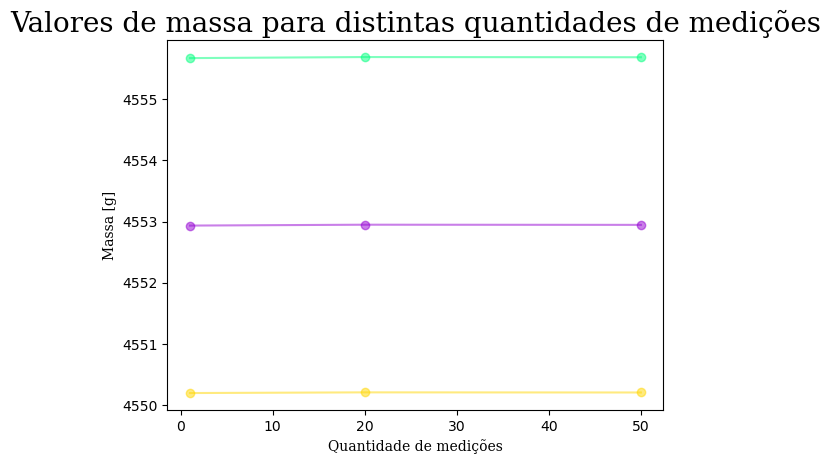

In [26]:
## Gráfico para valores de massa para distintas quantidades de medições
med = [1,20,50]
tnd2 = [4552.9349999999995,4552.9492199999995, 4552.9465199999995]
tndmax2 = [4555.673051643476, 4555.690270444353, 4555.687001051781]
tndmin2 = [4550.1969483565235, 4550.208169555647, 4550.2060389482185]
plt.scatter(med, tnd2, c="darkviolet", alpha=0.5)
plt.scatter(med, tndmax2, c="springgreen", alpha=0.5)
plt.scatter(med, tndmin2, c="gold", alpha=0.5)
plt.plot(med, tnd2, c="darkviolet", alpha=0.5)
plt.plot(med, tndmax2, c="springgreen", alpha=0.5)
plt.plot(med, tndmin2, c="gold", alpha=0.5)
plt.xlabel("Quantidade de medições", font='serif')
plt.ylabel("Massa [g]", font='serif')
plt.title("Valores de massa para distintas quantidades de medições",font='serif',fontsize=20)

plt.show()

### 3.4 (d)
#### Conforme o gráfico acima, os valores foram consistentes, com pouca variação.

# 3.5 Determinação de massa desconhecida

In [290]:
## Calculando erros e subtraindo 2000g
desc = pd.read_csv("desc.csv")
v1 = np.interp(desc.values.mean(),x1,tnd)
v2 = np.interp(desc.values.mean(),x1,tndmin)
v3 = np.interp(desc.values.mean(),x1,tndmax)

vv = desc.values.mean() - v1 - 2000
vv1 = desc.values.mean() - v2 - 2000
vv2 = desc.values.mean() - v3 - 2000
print(":{}".format(vv))
print("min: {}".format(vv1))
print("max: {}".format(vv2))

:2335.53114
min: 2338.2256576464015
max: 2332.8366223535986


### 3.5
#### Os valores colocados na balança foram a massa desconhecida e a massa de 2000g, calculando os valores de erro para as 100 medições utilizando a curva de erros e descontando as 2000g, encontrou-se os valores de 2335.53114g, 2338.2256576464015g e 2332.8366223535986g.

# 3.6 Determinação de soma de massas

In [302]:
### Interpolando erro de acordo com a curva
c1 = pd.read_csv("c1.csv")
v1 = np.interp(3150,x1,tnd)
vv = c1.values.mean() - v1 #considerando erro
 
print(vv)

3154.7


### 3.6(a)
#### O valor da medição considerando a curva foi de 3154.7g

In [27]:
## Calculando erro
c1 = pd.read_csv("c2.csv")
v1 = np.interp(2900,x1,tnd)
vv = c1.values.mean() - v1 #considerando erro

print(vv)

2904.2


### 3.6 (b)
#### O valor da medição considerando a curva foi de 2904.2g conforme acima

In [28]:
## Calculando erro
c1 = pd.read_csv("c3.csv")
v1 = np.interp(6050,x1,tnd)
vv = c1.values.mean() - v1 #considerando erro

print(vv)

6056.34


### 3.6 (d)
#### O valor da medição considerando a curva foi de 6056.34g